In [2]:
import pandas as pd
from Environments import TrainingEnv
from Environments import TestingEnv

In [3]:
from stable_baselines3.common.env_checker import check_env

In [4]:
training_data = pd.read_csv('KO_Training.csv')
training_data.drop(labels=['Date'], axis=1, inplace=True)
training_data

,Close,MACD,MACD Percentage,Volume Oscillator,CV,RSI,Pct Change
0,11.308797,0.022570,0.019975,0.010730,0.006938,0.085419,-0.001687
1,11.445312,0.057869,0.051096,0.025401,0.007865,0.161772,0.012072
2,11.396167,0.051412,0.045344,-0.036161,0.008170,0.179046,-0.004294
3,11.595476,0.107513,0.094433,0.043144,0.009822,0.454556,0.017489
4,11.600936,0.122427,0.107163,-0.044225,0.010095,0.448771,0.000471
...,...,...,...,...,...,...,...
3511,38.949238,-0.043922,-0.011211,-0.031367,0.007709,-0.001884,-0.013664
3512,39.065468,-0.057694,-0.014734,-0.062091,0.006846,-0.120565,0.002984
3513,39.522022,0.087184,0.022228,-0.067054,0.006967,-0.191955,0.011687
3514,39.613335,0.167581,0.042647,-0.086841,0.007610,-0.236752,0.002310


In [5]:
validation_data = pd.read_csv('KO_Validation.csv')
validation_data.drop(labels=['Date'], axis=1, inplace=True)
validation_data

,Close,MACD,MACD Percentage,Volume Oscillator,CV,RSI,Pct Change
0,37.587849,-0.872195,-0.225966,0.256776,0.047826,-0.711635,-0.012647
1,37.305592,-0.847479,-0.220908,0.204633,0.046310,-0.633333,-0.007509
2,37.098072,-0.826353,-0.216701,0.131497,0.042142,-0.543106,-0.005563
3,37.305592,-0.676559,-0.178122,0.053638,0.032990,-0.486963,0.005594
4,37.637650,-0.448119,-0.118175,0.057767,0.007925,-0.417338,0.008901
...,...,...,...,...,...,...,...
733,55.732937,0.373286,0.067446,0.044475,0.005492,-0.143599,0.001642
734,55.504528,0.237109,0.042819,0.091595,0.005481,-0.216219,-0.004098
735,55.230431,0.072632,0.013123,0.157915,0.005510,-0.208192,-0.004938
736,54.782742,-0.143703,-0.026012,0.226598,0.006533,-0.328508,-0.008106


In [6]:
testing_data = pd.read_csv('KO_Testing.csv')
testing_data.drop(labels=['Date'], axis=1, inplace=True)
testing_data

,Close,MACD,MACD Percentage,Volume Oscillator,CV,RSI,Pct Change
0,55.285255,-0.158030,-0.028187,0.090026,0.012861,-0.092494,-0.017535
1,57.423203,0.353403,0.062759,0.069113,0.015066,0.190168,0.038671
2,56.865875,0.353167,0.062605,0.102477,0.013836,0.268966,-0.009706
3,56.619190,0.242474,0.042954,0.008325,0.012668,0.367624,-0.004338
4,57.039471,0.308872,0.054613,-0.034158,0.011931,0.390397,0.007423
...,...,...,...,...,...,...,...
734,62.830002,0.331114,0.053071,-0.063840,0.010962,0.117735,0.007537
735,64.050003,0.693556,0.110629,-0.092507,0.013334,0.103832,0.019417
736,63.480000,0.597412,0.095076,-0.125261,0.013899,0.158710,-0.008899
737,63.349998,0.462406,0.073481,-0.143501,0.014274,0.281399,-0.002048


In [7]:
episode_length = len(testing_data)

training_env = TrainingEnv(training_data, episode_length=episode_length)
check_env(training_env, warn=True)
validation_env = TestingEnv(validation_data)
check_env(validation_env, warn=True)
testing_env = TestingEnv(testing_data)
check_env(testing_env, warn=True)

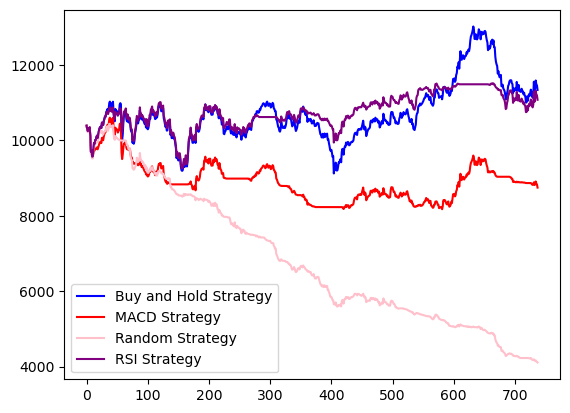

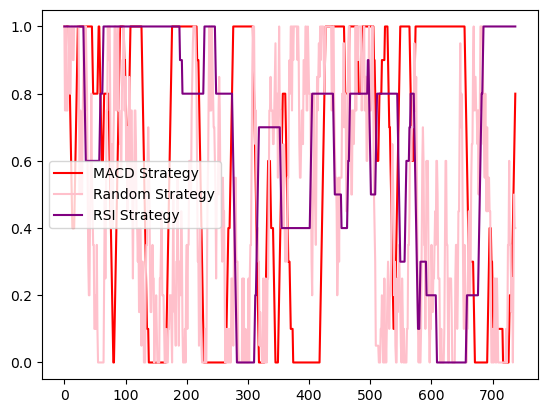

In [12]:
import matplotlib.pyplot as plt

buy_and_hold_strategy_value = []
MACD_strategy_value = []
MACD_asset_allocations = []
random_asset_allocations = []
RSI_asset_alloctions =[]

obs, info = testing_env.reset()
while True:

    # sell 10% if MACD is very low, buy 10% if MACD is very high, otherwise do nothing
    if info['MACD'] < -.3:
        action = 1
    elif info['MACD'] > 0.3:
        action = 3
    else:
        action = 2
    obs, reward, terminated, truncated, info = testing_env.step(action)
    MACD_strategy_value.append(info['Portfolio Value'])
    buy_and_hold_strategy_value.append(info['Buy and Hold Value'])
    MACD_asset_allocations.append(info['Asset Allocation'])
    if terminated or truncated:
        break

random_strategy_value = []
obs, info = testing_env.reset()
while True:

    action = testing_env.action_space.sample()
    obs, reward, terminated, truncated, info = testing_env.step(action)
    random_strategy_value.append(info['Portfolio Value'])
    random_asset_allocations.append(info['Asset Allocation'])
    if terminated or truncated:
        break

RSI_strategy_value = []
obs, info = testing_env.reset()
while True:

    # buy 10% if RSI is low, sell 10% if RSI is high 
    # RSI typically uses 30 and 70 for thresholds, which maps
    # -.4 and .4 here after taking scaling into account
    if info['RSI'] < -.4:
        action = 3
    elif info['RSI'] > 0.4:
        action = 1
    else:
        action = 2
    obs, reward, terminated, truncated, info = testing_env.step(action)
    RSI_strategy_value.append(info['Portfolio Value'])
    RSI_asset_alloctions.append(info['Asset Allocation'])
    if terminated or truncated:
        break

plt.figure()
plt.plot(buy_and_hold_strategy_value, "blue", label="Buy and Hold Strategy")
plt.plot(MACD_strategy_value, "red", label="MACD Strategy")
plt.plot(random_strategy_value, "pink", label="Random Strategy")
plt.plot(RSI_strategy_value, "purple", label="RSI Strategy")
plt.legend()

plt.figure()
plt.plot(MACD_asset_allocations, "red", label="MACD Strategy")
plt.plot(random_asset_allocations, "pink", label="Random Strategy")
plt.plot(RSI_asset_alloctions, "purple", label="RSI Strategy")
plt.legend()
plt.show()

In [59]:
# from stable_baselines3 import DQN
# from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement

# stop_train_callback = StopTrainingOnNoModelImprovement(max_no_improvement_evals=3, min_evals=5, verbose=1)
# eval_callback = EvalCallback(validation_env, eval_freq=100, callback_after_eval=stop_train_callback, verbose=1)

# model = DQN("MlpPolicy", training_env, buffer_size=5000, learning_rate=0.005, seed=6)
# model.learn(int(1e10), callback=eval_callback)

In [60]:
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback

class TensorboardCallback(BaseCallback):
    def __init__(self, env, eval_freq, verbose=0):
        super().__init__(verbose)
        self.env = env
        self.eval_freq = eval_freq

    def _on_step(self) -> bool:
        if self.n_calls % self.eval_freq == 0:
            obs, info = self.env.reset()
            rewards = []
            while True:
                action, _states = self.model.predict(obs, deterministic=True)
                obs, reward, terminated, truncated, info = self.env.step(action)
                rewards.append(reward)
                if terminated or truncated:
                    break
            self.logger.record("Mean Validation Set Reward", np.array(rewards).mean())
            self.logger.record("Cumulative Validation Set Reward", np.array(rewards).sum())
        return True


In [61]:
from stable_baselines3 import DQN

# eval_callback = EvalCallback(training_env, eval_freq=500, verbose=0)

tensorboard_callback = TensorboardCallback(validation_env, 500)
model = DQN("MlpPolicy", training_env, buffer_size=5000, seed=6, exploration_fraction=0.5, tensorboard_log="./tensorboard", learning_rate=0.001)
# model.learn(500*1000, callback=eval_callback)
model.learn(500*10000, callback = tensorboard_callback)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_performance(env, data):
    portfolio_values = []
    budget = 10000
    budgets = []
    obs, info = env.reset()
    asset_allocations = []
    actions = []
    while True:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        percent_change = (data.iloc[env.cur_row_num, 0] - data.iloc[env.cur_row_num-1, 0]) / data.iloc[env.cur_row_num-1, 0]
        budget = budget * (1+percent_change)
        budgets.append(budget)
        portfolio_values.append(info['Portfolio Value'])
        asset_allocations.append(info['Asset Allocation'])
        actions.append(info['Action Taken'])
        if terminated or truncated:
            break
    plt.figure()
    plt.plot(np.array(asset_allocations))
    plt.figure()
    plt.hist(np.array(actions), bins=5)
    plt.figure()
    plt.plot(np.array(portfolio_values), "blue")
    plt.plot(np.array(budgets), "red")
    plt.show()

In [27]:
len(training_data)
training_data.head()

,Close,Volume,SMA Ratio,RSI,Bandwidth,Pct Change
0,0.033748,0.082265,0.808793,0.614203,0.076375,0.354850
1,0.033389,0.051950,0.803937,0.680861,0.066035,0.380485
2,0.035095,0.066910,0.794504,0.672312,0.058724,0.403359
3,0.030156,0.055416,0.776058,0.518389,0.057444,0.329992
4,0.027822,0.041849,0.757639,0.516280,0.061770,0.358389


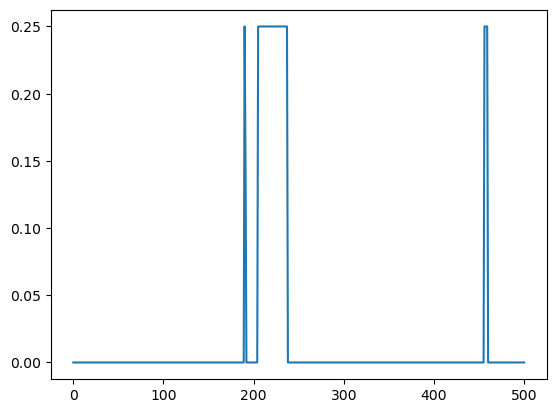

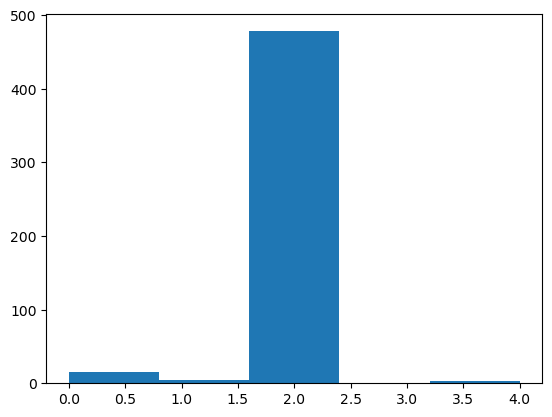

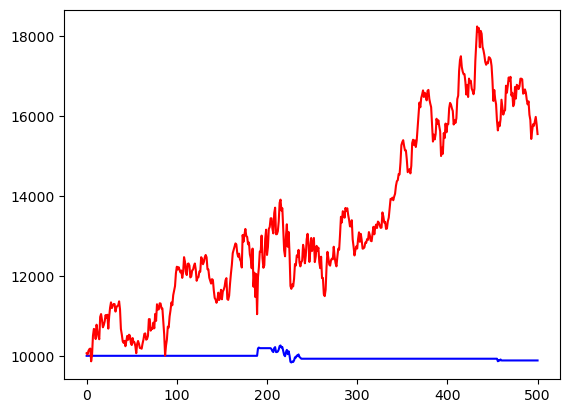

In [64]:
visualize_performance(training_env, training_data)

In [ ]:
# revisit features - see below
# create new branch where the dataset is split into 10 periods and alternating periods are designated for training, the rest are for validation or testing
#        change training so that training episodes consist of one of the 5 training periods to better match validation/testing periods
# fix tests for the new branch and then see if it results in better validation/testing performance
# also think about using optuna for hyperparameter tuning

In [ ]:
# EMA crossover (MACD), volume oscillator, RSI, Std dev, %change, asset allocation
# try using just EMA crossover at first, then experiment with adding features

In [22]:
# from stable_baselines3 import DQN
# import optuna

# max_return = 0.0

# def objective(trial):
#     global max_return
#     learning_rate = trial.suggest_float('learning rate', 0.0001, 0.01)
#     gamma = trial.suggest_float('gamma', 0.95, 0.999)
#     exploration_fraction = trial.suggest_float('exploration fraction', 0.1, 0.3)
#     total_timesteps = trial.suggest_int('total_timesteps', 250 * 50, 250 * 1000)


#     model = DQN("MlpPolicy", training_env, learning_rate=learning_rate, 
#                 buffer_size=5000, gamma=gamma, exploration_fraction=exploration_fraction)
    

#     model.learn(total_timesteps=total_timesteps)

#     obs, info = validation_env.reset()
#     while True:
#         action, _states = model.predict(obs, deterministic=True)
#         obs, reward, terminated, truncated, info = validation_env.step(action)
#         if terminated or truncated:
#             break

#     raw_return = (validation_env.portfolio_value - validation_env.budget) / validation_env.budget
#     if raw_return > max_return:
#         model.save("RL_Agent")
#         max_return = raw_return
#     del model
#     return -raw_return

    


# study = optuna.create_study()
# study.optimize(objective, n_trials = 20, show_progress_bar=True)

# print(f'Best Parameters: {study.best_params}')
# print(f'Best value: {study.best_value}')